In [1]:
import os
import torchaudio
import torch
from EgoExoEMS.EgoExoEMS import EgoExoEMSDataset, collate_fn, transform


In [2]:
root = "/standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng9/cardiac_arrest/1/GoPro/GX010346_encoded_trimmed.mp4"  # Folder in which all videos lie in a specific structure
annotation_file = "../../Annotations/main_annotation.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)

# train_annotation_file = "../../Annotations/splits/keysteps/train_split.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)
# val_annotation_file = "../../Annotations/splits/keysteps/val_split.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)
# test_annotation_file = "../../Annotations/splits/keysteps/test_split.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)

train_dataset = EgoExoEMSDataset(annotation_file=annotation_file,
                                data_base_path='',
                                fps=29.97, frames_per_clip=None, transform=transform)

# Access a sample
print(len(train_dataset))





1432


In [3]:
# import torchvision
# from torchvision.io import VideoReader
# import os
# import itertools

# start_t = 71.30542
# end_t = 72.993
# video_path = root
# # video_path = "/standard/UVA-DSA/NIST EMS Project Data/CognitiveEMS_Datasets/North_Garden/Sep_2024/Raw/24-09-2024/Bhavik/cardiac_arrest/4/GoPro/GX010399.MP4"  # Folder in which all videos lie in a specific structure
# video_reader = VideoReader(video_path, "video")
# frames = []


# for frame in itertools.takewhile(lambda x: x['pts'] <= end_t, video_reader.seek(start_t)):
#     if(frame['pts'] < start_t):
#         continue
#     print(frame['pts'])
#     img_tensor = transform(frame['data'])
#     frames.append(img_tensor)

# frames = torch.stack(frames)
# print("Seeking from ", start_t, " to ", end_t, "for video ", video_path)
# print("Frames shape: ", frames.shape)

In [4]:
# create a data loader
# batch size is 1 for simplicity and to ensure only a full clip related to a key step is given without collating.
# if batch size is greater than 1, collate_fn will be called to collate the data.
data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)

In [5]:
# Iterate over the data loader and print the shape of the batch
for batch in data_loader:
    print(batch['frames'].shape, batch['audio'].shape, batch['flow'].shape, batch['rgb'].shape, batch['smartwatch_imu'].shape, batch['depth_sensor'].shape , batch['keystep_label'], batch['keystep_id'], batch['start_frame'], batch['end_frame'],batch['start_t'], batch['end_t'],  batch['subject_id'], batch['trial_id'])
    audio_tensor = batch['audio'][0]
    #transpose
    audio_tensor = audio_tensor.transpose(0,1)
    # torchaudio.save("./visualizations/audio.wav", audio_tensor,48000)
    break   

/scratch/cjh9fw/conda/egoexoems/lib/python3.8/site-packages/torchvision/io/video_reader.py:233: UserWarning: Accurate seek is not implemented for pyav backend
  warnings.warn("Accurate seek is not implemented for pyav backend")


Seeking from  128.949  to  144.11994 for video  /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/2/GoPro/GX010334_encoded_trimmed.mp4
torch.Size([1, 455, 3, 224, 224]) torch.Size([1, 729088, 2]) torch.Size([1, 1, 1024]) torch.Size([1, 1, 1024]) torch.Size([1, 455, 3]) torch.Size([1, 455, 1]) ['chest_compressions'] tensor([4]) tensor([3864]) tensor([4319]) tensor([128.9490]) tensor([144.1199]) ['ng3'] ['2']


/scratch/cjh9fw/conda/egoexoems/lib/python3.8/site-packages/torchvision/io/video_reader.py:233: UserWarning: Accurate seek is not implemented for pyav backend
  warnings.warn("Accurate seek is not implemented for pyav backend")


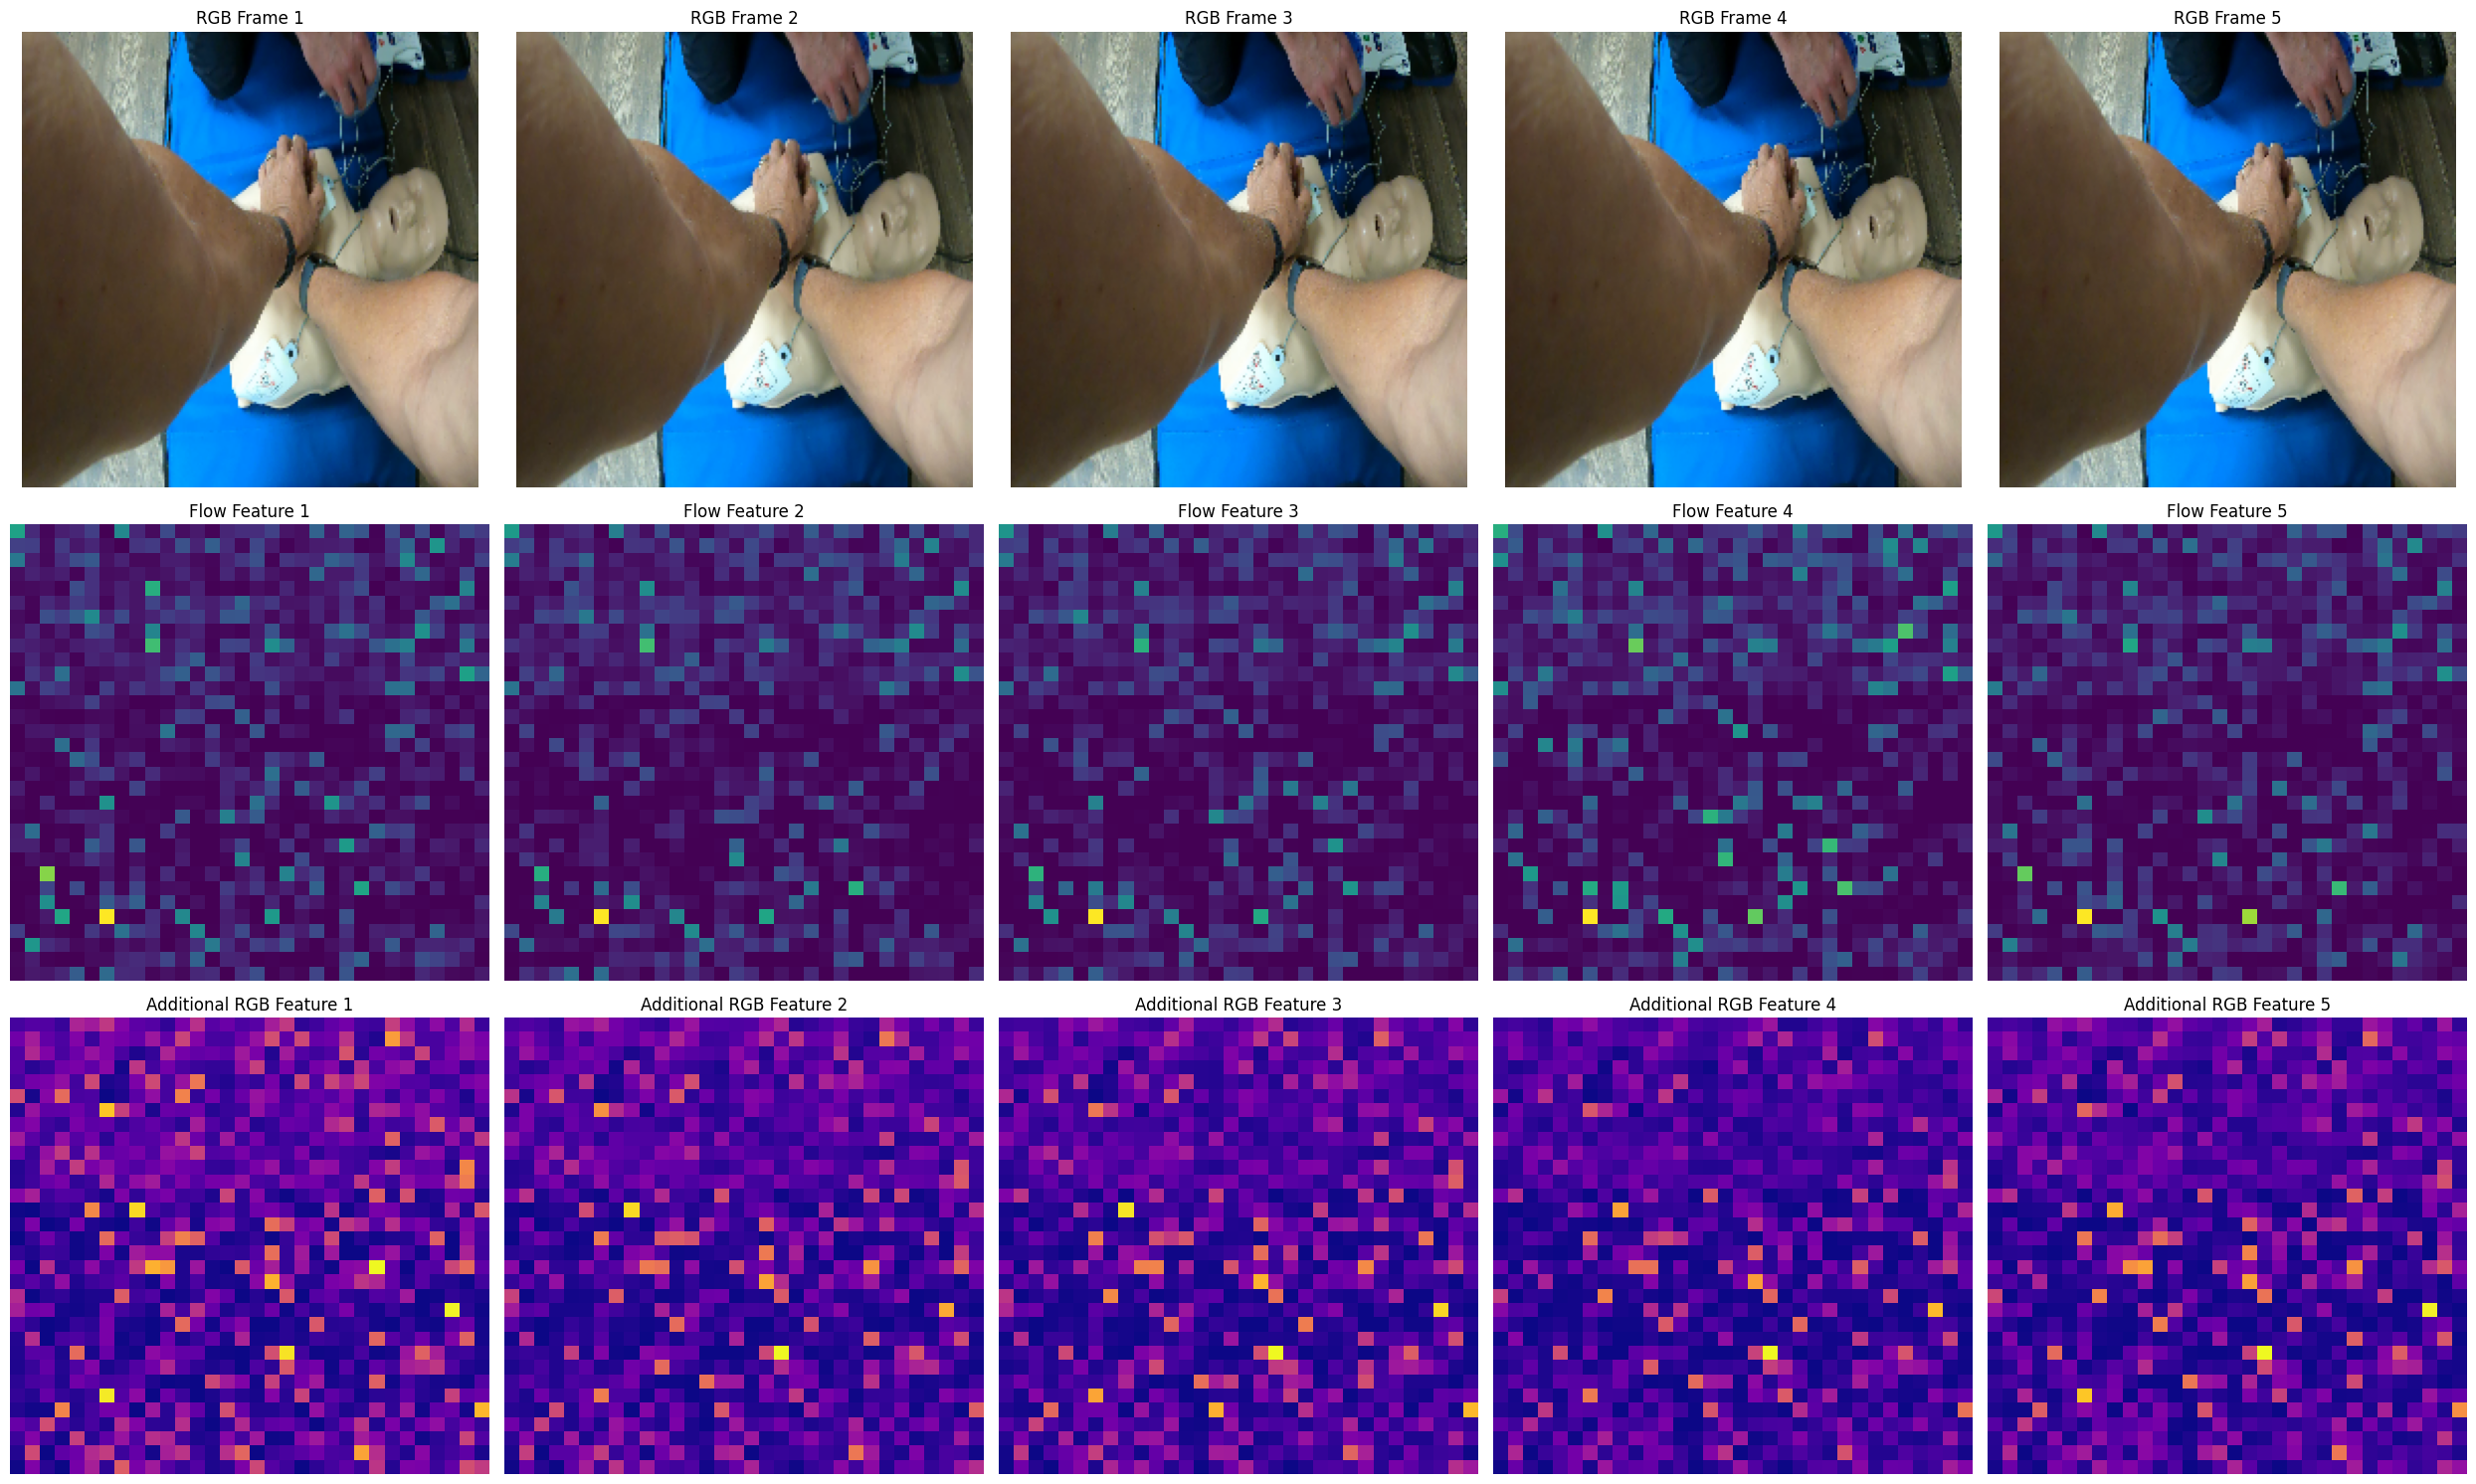

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rgb_and_flow(rgb_frames, flow_frames, rgb_feature):
    # Assume rgb_frames is of shape (frames, height, width, 3) and flow_frames is (frames, 1024)
    num_frames = rgb_frames.shape[0]
    
    fig, axes = plt.subplots( 3,num_frames, figsize=(num_frames * 5, 15))

    for i in range(num_frames):
        rgb_image = rgb_frames[i].permute(1, 2, 0).cpu().numpy()
        
        # Plot RGB frame
        axes[ 0,i].imshow(rgb_image)
        axes[ 0,i].axis('off')
        axes[ 0,i].set_title(f"RGB Frame {i+1}")
        
        # Plot flow data as a heatmap for the corresponding frame
        axes[ 1,i].imshow(flow_frames[i].reshape(32, 32), cmap='viridis', aspect='auto')  # assuming 1024 is reshaped to 32x32
        axes[ 1,i].axis('off')
        axes[ 1,i].set_title(f"Flow Feature {i+1}")
        
        
        # Plot the  feature as a heatmap
        rgb_image = rgb_feature[i].cpu().numpy().reshape(32, 32)  # Reshape to 32x32
        axes[2, i].imshow(rgb_image, cmap='plasma', aspect='auto')
        axes[2, i].axis('off')
        axes[2, i].set_title(f"Additional RGB Feature {i+1}")
        
        # save each figure
        plt.savefig(f"./visualizations/frame_{i}.png")

    plt.tight_layout()
    plt.show()

# Example usage with your batch data
plot_rgb_and_flow(batch['frames'][0][10:15], batch['flow'][0][10:15], batch['rgb'][0][10:15])


In [16]:
! ffmpeg

ffmpeg version 4.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/opt/conda/conda-bld/ffmpeg_1597178665428/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeh --cc=/opt/conda/conda-bld/ffmpeg_1597178665428/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libsw

120


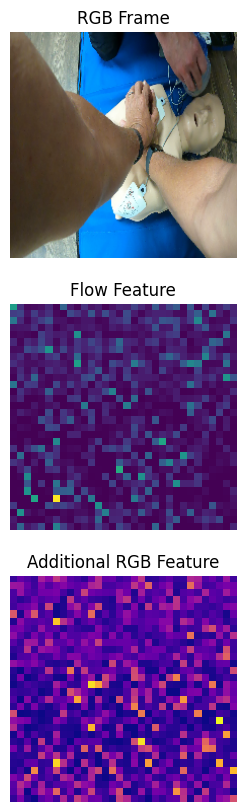

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

def animate_rgb_and_flow(rgb_frames, flow_frames, additional_rgb):
    num_frames = rgb_frames.shape[0]
    
    fig, axes = plt.subplots(3, 1, figsize=(6, 10))
    
    # Initialize the images that will be updated
    rgb_im = axes[0].imshow(np.zeros((rgb_frames.shape[2], rgb_frames.shape[3], 3)))
    flow_im = axes[1].imshow(np.zeros((32, 32)), cmap='viridis')
    add_rgb_im = axes[2].imshow(np.zeros((32, 32)), cmap='plasma')
    
    axes[0].set_title('RGB Frame')
    axes[1].set_title('Flow Feature')
    axes[2].set_title('Additional RGB Feature')
    
    # Turn off axis for cleaner visuals
    for ax in axes:
        ax.axis('off')
    
    def update(frame):
        # Ensure RGB is in the range [0, 1] for display
        rgb_image = rgb_frames[frame].permute(1, 2, 0).cpu().numpy()
        rgb_im.set_data(rgb_image)
        
        # Flow and Additional RGB Features: Reshape and normalize for visualization
        flow_image = flow_frames[frame].cpu().numpy().reshape(32, 32)
        flow_im.set_data(flow_image)
        flow_im.set_clim(vmin=np.min(flow_image), vmax=np.max(flow_image))  # Set dynamic color range
        
        additional_rgb_image = additional_rgb[frame].cpu().numpy().reshape(32, 32)
        add_rgb_im.set_data(additional_rgb_image)
        add_rgb_im.set_clim(vmin=np.min(additional_rgb_image), vmax=np.max(additional_rgb_image))  # Set dynamic color range
        
        return [rgb_im, flow_im, add_rgb_im]
    
    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=200, blit=True)
    
    # Save as GIF using Pillow backend
    ani.save('./visualizations/animated_video.gif', writer='pillow', fps=30)
    
    plt.show()
    
min_index = batch['flow'][0].shape[0]
print(min_index)
# Example usage with your batch data
animate_rgb_and_flow(batch['frames'][0][0:min_index], batch['flow'][0], batch['rgb'][0])
